<a href="https://colab.research.google.com/github/iiserkbikram/Classifying-movie-review-Using-simpe-Neural-Network/blob/main/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The IMDB Dataset
We will work with the IMDB datast which contains a set of 50,00 highly polarized revfew form Internet Movie Database. We have 25000 review for training and 25000 reviews for testing, and each set contains 50% neagtivea and 50% positive reviews.

In [2]:
# Loading the IMDB data sets
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
# num_words=10000 means we will only keep the top 10,000 most frequently occuring words in the training data

In [3]:
train_data[0]
# each review is a list of word indices (encoding a sequence of words)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

# 0 stands for negative and 1 stands for positive review

1

In [5]:
# Since we restricting to top 10,000 most frequent words, no word index will exceed 10,000. Let's check
max([max(sequence) for sequence in train_data])

9999

In [6]:
# # Lets look at how wen quickly decode these reviewd back to english words:

# word_index = imdb.get_word_index() # word index is dictionary mapping words to an integer index
# reverse_word_index = dict(
#     [(value, key) for (key,value) in word_index.items()]) # reverse it, mapping integer indices to words
# decode_review = " ".joint(
#     [reverse_word_index.get(i-3,"?") for i in train_data[0]]) # decodes the review. Please note that idneces are offset by 3 cause 
#                                                               # 0,1 and 2 are researved indices for"padding", "start of sequence" and "unknown"


In [7]:
# Preaparing the data
# Since we can not feed lists of intergers into a neural network we will have to turn our lists into tensors by One-hot encode

# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension)) # creates an all zero matrix of shape(len(sequences),dimesion)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data) # vectorizes training data
x_test = vectorize_sequences(test_data) # vectorizes test data

In [8]:
# Lets see how sampels looks like now
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Similarly let's vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
# Building a Network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [11]:
# Compiling the model
from keras import optimizers
from keras import losses

model.compile(optimizer= optimizers.Adam(), 
              loss= losses.binary_crossentropy,  # Since we are dealing with binary classification and probabilty
              metrics= ['accuracy'])

In [12]:
# Validate our Approach

# Setting aside a validatioin set
x_val = x_train[:10000]
partial_x_train =  x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [13]:
# Training the Model

model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')

In [14]:
# We will now train the model for 20 epochs (20 iterations over all the samples in x_train and y_train tensors), 
# in mini-batches of 512 samples. At the same time, you'll moniter loss and accuracy on the 10,000 samples that we set apart.
# We do so by passing the validation data as the validation_data argument.


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 44ms/step - loss: 0.5341 - accuracy: 0.7863 - val_loss: 0.4172 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3304 - accuracy: 0.8988 - val_loss: 0.3353 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2398 - accuracy: 0.9240 - val_loss: 0.2840 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1897 - accuracy: 0.9385 - val_loss: 0.2732 - val_accuracy: 0.8927
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1539 - accuracy: 0.9491 - val_loss: 0.2762 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1270 - accuracy: 0.9603 - val_loss: 0.2867 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1047 - accuracy: 0.9692 - val_loss: 0.3143 - val_accuracy: 0.8834
Epoch 8/20
30

In [15]:
# Note that model.fit() returns a History object. This object has memeber history, which is dictionay containing data about
# everything that happend during training. Let's have look at it

history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
# This dictionary contains four entries: one per metric that was being monitored during training and during validaation. 
# In the following two listings, let's use Matplotlib to plot the training and validation loss side by side, as well as
# training and validation accuracy. 


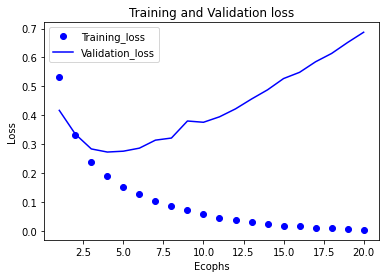

In [21]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,epochs + 1)

plt.plot(epochs, loss_values,'bo', label="Training_loss")
plt.plot(epochs,val_loss_values,"b",label="Validation_loss")
plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()


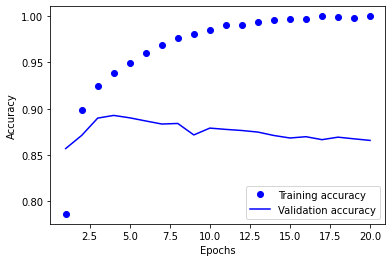

In [22]:
# Plotting the trainin and validation accurcy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, "bo", label = "Training accuracy")
plt.plot(epochs,val_acc_values,'b', label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()

plt.show()



In [23]:
# Observation

# The training loss decrease with every epochs and training accuracy increase with every epochs

# However it is not the case in case validation loss and accuracy. We would expect when running gradient descent optimization the quantity you are
# trying to minimize should be less with every iteration. 

# The model is overfitting after the second epochs, we are overoptimizing on the training data and dont generalize to data outside of the training set.

# To prevent overfittng we can stop training after three epochs. Let's see


In [24]:
# Retrainng a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test,y_test)


Epoch 1/3
49/49 [==============================] - 1s 14ms/step - loss: 0.4728 - accuracy: 0.8046
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2637 - accuracy: 0.9086
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2887 - accuracy: 0.8836


In [25]:
results

[0.2886602282524109, 0.8835999965667725]

In [26]:
# Using our trained Network to generate predicts on new data
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.23584855],
       [0.9999422 ],
       [0.93469226],
       ...,
       [0.16739096],
       [0.12092026],
       [0.7267837 ]], dtype=float32)